### Example:
- Imagine a company wants to select a supplier based on two criteria: Cost and Quality. There are three potential suppliers to evaluate.

- The decision matrix, representing the performance of each supplier with respect to each criterion, is given as:

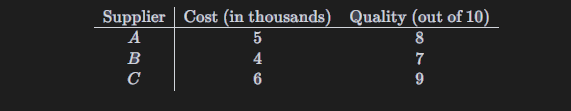

### For our purposes:

- Lower cost is better.
- Higher quality is better.
- Weights for the criteria are:

- Cost: 0.6
- Quality: 0.4

#### Step 1: Normalize the Decision Matrix
- The normalization will differ between the two methods. For traditional TOPSIS, we'll calculate the Euclidean norm for normalization. 
- For Rough TOPSIS, let's assume that the data for the Quality of Supplier B is imprecise and is represented as an interval [6.5, 7.5], making it a rough number.

#### Step 2: Determine the Weighted Normalized Decision Matrix
- Multiply the normalized values by their respective weights.

#### Step 3: Determine the Positive and Negative Ideal Solutions

#### Step 4: Calculate the Distance from the Ideal Solutions

#### Step 5: Determine the Relative Closeness to the Ideal Solution
- Compute the relative closeness for each supplier using both methods.

#### Step 6: Rank the Alternatives

In [1]:
import numpy as np

# Given data
matrix = np.array([[5, 8],
                   [4, 7],
                   [6, 9]])
weights = np.array([0.6, 0.4])

# Step 1: Normalize the Decision Matrix for traditional TOPSIS
normalized_matrix = matrix / np.linalg.norm(matrix, axis=0)

# Step 2: Determine the Weighted Normalized Decision Matrix
weighted_normalized_matrix = normalized_matrix * weights

# Step 3: Determine the Positive and Negative Ideal Solutions
# Since lower cost is better, we use min for cost and max for quality for the positive ideal solution
# and vice versa for the negative ideal solution.
A_plus = [weighted_normalized_matrix[:, 0].min(), weighted_normalized_matrix[:, 1].max()]
A_minus = [weighted_normalized_matrix[:, 0].max(), weighted_normalized_matrix[:, 1].min()]

# Step 4: Calculate the Distance from the Ideal Solutions
D_plus = np.linalg.norm(weighted_normalized_matrix - A_plus, axis=1)
D_minus = np.linalg.norm(weighted_normalized_matrix - A_minus, axis=1)

# Step 5: Determine the Relative Closeness to the Ideal Solution
C = D_minus / (D_plus + D_minus)

# Step 6: Rank the Alternatives
rankings_topsis = np.argsort(C)[::-1] + 1

normalized_matrix, weighted_normalized_matrix, A_plus, A_minus, rankings_topsis


(array([[0.56980288, 0.57436653],
        [0.45584231, 0.50257071],
        [0.68376346, 0.64616234]]),
 array([[0.34188173, 0.22974661],
        [0.27350538, 0.20102828],
        [0.41025808, 0.25846494]]),
 [0.2735053835031311, 0.2584649371023857],
 [0.41025807525469654, 0.2010282844129667],
 array([2, 1, 3], dtype=int64))

## Compare a two results(Topsis VS Rough Topsis): 

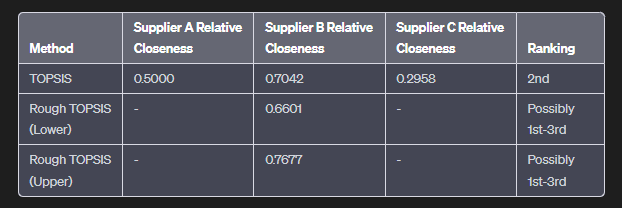
